In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()  #base is function inside sql alch
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found; all classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table #cap
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
##########################################
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.id,Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).filter(Measurement.date > '2016-08-23').order_by(Measurement.date.desc()).all()
#print(results)

total_data = session.query(Measurement.id,Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).order_by(Measurement.date.desc()).all()
#print(total_data)

########################################## 
# Calculate the date 1 year ago from the last data point in the database
one_year = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
one_year_df = pd.DataFrame(one_year)
one_year_value = one_year_df.iloc[0, 0]  #output'2017-08-23'
z = one_year_value.split("-", 1)  #output ['2017', '08-23']
month_day = (z[1])  #output 08-23
year_2016 = int(z[0]) - 1  #output 2016
year_2016_str = str(year_2016)  #output 2016 as string
one_year_ago_date = year_2016_str + "-" +month_day
#print(one_year_ago_date) # output 2016-08-23
############dates range from 2010-01-01 to 2017-08-23
############one year from last measurement is 2016-08-23
##########################################

##########################################
# Perform a query to retrieve the date and precipitation scores
date_precip = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).all()
print(date_precip)
##########################################

##########################################
# Save the query results as a Pandas DataFrame and set the index to the date column
date_precip_df = pd.DataFrame(date_precip)
date_precip_df_index_date = date_precip_df.set_index('date')
date_precip_df_index_date.columns = ['Precipitation']
date_precip_df_index_date


# Sort the dataframe by date
date_precip_df 

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


Text(0, 0.5, 'Precipitation')

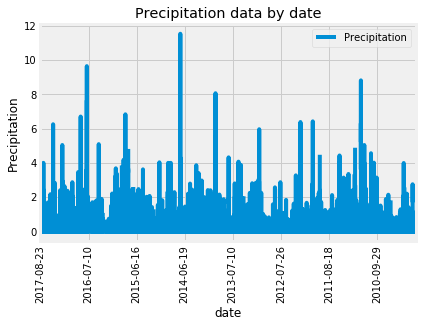

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

date_precip_df_index_date.plot(rot=90)

plt.title("Precipitation data by date")
plt.xlabel("date")
plt.ylabel("Precipitation")





![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precip_df_index_date.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [14]:
# Design a query to show how many stations are available in this dataset?
total_data  #it's in a list
#output
# [(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
# (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
# (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
total_data_df = pd.DataFrame(total_data)
total_data_df
#    id	    station	     date	    prcp	tobs
#0	2724	USC00519397	2017-08-23	0.00	81.0
#1	7635	USC00514830	2017-08-23	0.00	82.0
num_of_stations = total_data_df['station'].nunique()
num_of_stations_str = str(total_data_df['station'].nunique())
print("There are " + num_of_stations_str + " stations")

There are 9 stations


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
name_of_stations = total_data_df['station'].unique()
name_of_stations
x = total_data_df.groupby('station').count()
y = x['id']
y_df = pd.DataFrame(y)
y_df.columns = ['Number_of_records']
w = y_df.sort_values(by=['Number_of_records'], ascending=False)
w

,Number_of_records
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
total_data = pd.DataFrame(results)
total_data
station_USC00519281 = total_data[total_data['station'] == 'USC00519281']
station_USC00519281_minT = str(station_USC00519281['tobs'].min())
station_USC00519281_maxT = str(station_USC00519281['tobs'].max())
station_USC00519281_avgT = str(station_USC00519281['tobs'].mean())

v = pd.DataFrame(w)
v2 = v.reset_index()
t = v2.iloc[0]
most_active_station = t['station']
most_active_station

print("The most active station is: " + most_active_station)
print("The max temperature was: " + station_USC00519281_maxT)
print("The min temperature was: " + station_USC00519281_minT)
print("The average temperature was: " + station_USC00519281_avgT)

The most active station is: USC00519281
The max temperature was: 83.0
The min temperature was: 59.0
The average temperature was: 73.0968660968661


Text(0, 0.5, 'Frequency')

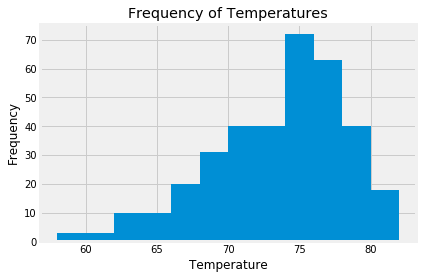

In [17]:
# Choose the station with the highest number of temperature observations.
station_USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_USC00519281_lastyear = station_USC00519281[station_USC00519281.date > "2016-08-18"]
station_USC00519281_lastyear
#`bins=12`.
bins = [58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82]
plt.hist(station_USC00519281["tobs"], bins)
plt.title("Frequency of Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example # invoking function
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# function usage example # invoking function
print(calc_temps('2016-08-17','2017-08-17'))


[(58.0, 74.60418521816563, 87.0)]


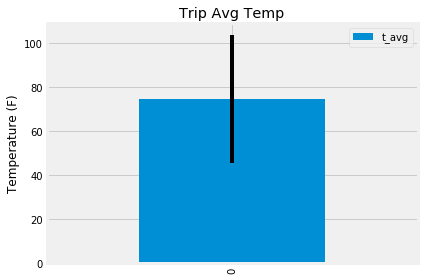

In [20]:
# Plot the results from your previous query as a bar chart. 
trip_temps = calc_temps('2016-08-17','2017-08-17')

trip_temps_df = pd.DataFrame(trip_temps, columns=['t_min', 't_avg', 't_max'])
trip_temps_df

trip_temps_df.plot.bar(y='t_avg', yerr=(trip_temps_df['t_max'])-(trip_temps_df['t_min']))



# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.ylabel("Temperature (F)")
plt.tight_layout()

In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [22]:
def calc_precip(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(
                         Measurement.station,\
                            Station.station,\
                            Station.name,\
                        Measurement.prcp,\
                        Station.latitude,\
                        Station.longitude,\
                        Station.elevation).\
        filter(Measurement.station == Station.station)\
        .filter(Measurement.date >= start_date)\
        .filter(Measurement.date <= end_date)\
        .group_by(Measurement.station)\
        .order_by(Measurement.prcp.desc()).all()

# function usage example # invoking function
print(calc_precip('2016-08-17', '2017-08-17'))

[('USC00519281', 'USC00519281', 'WAIHEE 837.5, HI US', 0.31, 21.45167, -157.84888999999998, 32.9), ('USC00516128', 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.3, 21.3331, -157.8025, 152.4), ('USC00513117', 'USC00513117', 'KANEOHE 838.1, HI US', 0.0, 21.4234, -157.8015, 14.6), ('USC00514830', 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 21.5213, -157.8374, 7.0), ('USC00517948', 'USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9), ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0), ('USC00519523', 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.0, 21.33556, -157.71139, 19.5)]


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
